# Lab 3: Propagation of Uncertainty Part II {-}

Name: 

## Activity I:  Exit Speed (50 pts)
### Equipment needed:
1. Cannon and plunger
2. Spherical steel ball (projectile)
3. Meter Stick

### Goal:  
Determine the speed with which the projectile leaves the cannon for all three launch settings with their associated uncertainties.  

### Procedure:  
  1. Set your cannon on the floor or table and set the launch angle to $90^\circ$ (straight up)
  2. Measure the distance from where the sphere exits the launcher to the peak of its trajectory.  Record the value and the uncertainty in the code cell provided below.
  3. In the cell below, record the best value of "g" from the previous lab with its associated uncertainty.
  4. You may remember the following kinematic equation: $$ v_f^2 = v_i^2 - 2 g h$$.   Do the algebra needed to solve this equation for $v_i$. Use $\LaTeX$ syntax to complete the equation below $$v_i = \sqrt{v_f^2 + 2 g h}$$
  5. On line 8 of the code cell below, define sympy symbols for g and delta_h. 
  6. On line 9 of the code cell below, enter the expression you found in step 4 for the initial velocity. To calculate a square root, use `sp.sqrt()`
  7. To calculate the uncertainty in the initial velocity, you need to take two derivatives of the function that you found in step 4; ${\partial v_i \over \partial g}$ and ${\partial v_i \over \partial h}$.  Use $\LaTeX$ syntax to complete the mathematical statements below with the expressions for these derivatives. $${\partial v_i \over \partial g} = {h\over \sqrt{v_f^2 + 2 g h}}$$ $${\partial v_i \over \partial h} = {g\over \sqrt{v_f^2 + 2 g h}}$$
  8. On lines 11 and 12 of the code cell below, use sympy to calculate the derivatives of vi with respect to g and h. 
  9. On lines 16 of the code cell below, substitute values for the symbols to get a value for the initial velocity.
  10. Now execute the cell below and compare python's derivatives to your hand-written ones. (You may need to comment out some lines that haven't been completed yet)
  11. The expression for the uncertainty for $v_i$ is  $$ \delta v_i =  \sqrt{({\partial v_i \over \partial g} \delta g)^2 + ({\partial v_i \over \partial h} \delta h)^2}$$  Perform this calculation on line 17 in the code cell below to obtain a value for the uncertainty in $v_i$.  
  12. Add a formatted print statement to display the initial velocity and its associated uncertainty (with units).

In [2]:
#| eval: false
#| echo: true
import sympy as sp
# Launch Parameters
h =   1.25        # distance from exit point to peak
un_h = 0.03       # uncertainty of the distance
g_val =  9.8         # acceleration due to gravity (refer to last week's results)
un_g =  0.5      # uncertainty in g (refer to last week's results)

g,dh = sp.symbols("g dh")       # define sympy symbols for g and delta_h (Line 8)
vi =  sp.sqrt(2 * g * dh)        # Calculate the initial speed (Line 9). 

dvdg = sp.diff(vi,g)  # Take the derivative with respect to g  (Line 11)
dvdh = sp.diff(vi,dh) # Take the derivative with respect to h (distance to peak) (Line 12)
display(dvdg)  # Display the derivatives to check that you did it right.
display(dvdh)

initialV = sp.N(vi.subs({g:g_val,dh:h}))# Substitute numbers in for the symbols.  (line 16)
Δvi =  sp.N(sp.sqrt((dvdg.subs({g:g_val,dh:h}) * un_g)**2 + (dvdh.subs({g:g_val,dh:h}) * un_h)**2))# Line 17

# Add a formatted print statement here to display your results.
print(initialV, Δvi)

sqrt(2)*sqrt(dh*g)/(2*g)

sqrt(2)*sqrt(dh*g)/(2*dh)

4.94974746830583 0.139541669586616


## Activity II - Projectile Motion Prediction (50 points)

### Equipment needed
1. Launcher Cannon
2. Spherical Steel Projectile
3. Meter Stick

### Goal
Predict the landing location for a launched projectile with its associated uncertainty.  Verify that observed results agree with your prediction to within your stated uncertainty.

### Procedure
#### Setup
1. Set your cannon on a table and aim it in a direction so that the projectile won't hit anything (or anyone).
2. Choose an initial launch angle and speed setting. Then adjust your cannon to match these choices.  Record your launch angle with its associated uncertainty (in radians) in the code cell below.
3. Transfer the initial velocity and uncerainty that you found from activity I into the code cell below.
4. Measure the distance from the ground to the projectile's point of exit.  Record this number with its associated uncertainty in the code cell below.  
5. On line 14 of the code cell below, define symbols for the variables $v_i$, $y_i$, $\theta$,$g$, and $t$.
6. On line 15 of the code cell below, define a dictionary containing the substitution rules for $v_i$, $y_i$, $\theta$, and $g$.

#### Calculations
7. You may recall the following kinematic equations from your PH121 class.   $$x_f = x_i + v_i \cos(\theta) t$$ $$y_f = y_i + v_i \sin(\theta) t -{1\over 2} g  t^2$$ Use the second of these equations to find an expression for the projectile's flight time in terms of $y_i$, $v_i$, $\theta$,  and $g$. Use $\LaTeX$ syntax to complete the equation below with your answer. **Hint:** You will have to solve a quadratic equation.$$ t = {-v_i \sin(\theta) \pm \sqrt{v_i^2 \sin^2(\theta) + 2 g y_i}\over -g}$$
8. Enter the expression that you found in part 5 on line 18 of the code cell below. Use `sp.sqrt()` for square root expressions and `sp.sin()` for sine expressions.   
9. On line 19 of the code cell, substitute values for $v_i$, $y_i$, $\theta$, and $g$ to obtain a value for the flight time.
10. To find the uncertainty in the flight time, you'll need to evaluate four partial derivatives: ${\partial t \over \partial v_i}$, ${\partial t \over \partial \theta}$, ${\partial t \over \partial g}$, and ${\partial t \over \partial y_i}$. We'll let python calculate these derivatives (don't do them by hand!), following the same pattern shown in activity I. Fill in lines 21 - 24 in the code cell below with the appropriate code to calculate the four relevant derivatives. (They will look similar to lines 11 and 12 from the code cell above.)
11. The expression for the uncertainty in the flight time is given by:$$ \delta t = \sqrt{({\partial t \over \partial v_i} \delta v_i)^2 + ({\partial t \over \partial \theta} \delta \theta)^2 + ({\partial t \over \partial y_i} \delta y_i)^2 + ({\partial t \over \partial g} \delta g)^2}$$  Fill in line 27 in the code cell below with the appropriate code to calculate this expression. (It will be similar to line 17 from the code cell above)
12. Now that you have the flight time with its uncertainty, you can use the first kinematic equation from above to calculate the projectile's landing location.   Use $\LaTeX$ syntax to complete an expression for the landing location $x_f$ in terms of $v_i$, $\theta$, and $t$.  $$x_f = v_i \cos(\theta) t$$
13. Enter the expression that you found in part 9 on line 33 of the code cell below.
14. On line 34 of the code cell, substitute values for $v_i$, $y_i$, $\theta$, $g$, and $t$ to obtain a value for the landing location.
15. To find the uncertainty in the landing location, you'll need to evaluate three partial derivatives: ${\partial x_f \over \partial v_i}$, ${\partial x_f \over \partial \theta}$, and ${\partial x_f \over \partial t}$. We'll let python calculate these derivatives, following the same pattern from activity I. Fill in lines 36 - 38 in the code cell below with the appropriate code to calculate the three relevant derivatives.(They will look similar to lines 11 and 12 from the code cell above.)
16. The expression for the uncertainty in the landing location:$$ \delta x_f = \sqrt{({\partial x_f \over \partial v_i} \delta v_i)^2 + ({\partial x_f \over \partial \theta} \delta \theta)^2 + ({\partial x_f \over \partial t} \delta t)^2}$$  Fill in line 43 in the code cell below with the appropriate code to calculate this expression. (It will be similar to line 17 from the code cell above)
17. Add formatted print statements to display the flight time and landing location with their associated uncertainties (include units).
18. Evaluate the code cell below and observe the results.  By experimenting with the uncertainties in measured values, can you determine which variable has the greatest affect on the uncertainty in the projectile's landing location?  


In [12]:
#| eval: false
#| echo: true
import sympy as sp
from matplotlib import pyplot as plt
import numpy as np

initialV = 4.9            # Initial speed of projectile.  
δ_vi =     0.1     # Uncertainty in initial speed of projectile.
theta =    30 * np.pi/180        # Launch angle (Must be in Radians!!)
δ_θ =      1 * np.pi/180   # Uncertainty in launch angle (Must be in radians)
h =        .25    # Initial height of projectile (meters).
δ_h =      .01   # Uncertainty in intial height (meters).
grav =     9.8       # Acceleration due to gravity (m/s^2). (Use value obtained in previous lab)
δ_g =      0.3   # Uncertainty in acceleration due to gravity (m/s^2)

vi,θ,yi,g,t = sp.symbols("vi θ yi g t") # Define the symbols you'll need. (Line 14)
values = {vi:initialV, θ:theta, yi:h, g:grav}# Define the dictionary with the substitution rules (Line 15)


time =    sp.sqrt((-vi * sp.sin(θ) - sp.sqrt(vi**2 * sp.sin(θ)**2 + 2 * g * yi))/(-g))    # Line 18 ** Use the - solution in the quadratic formula
tFlight=  time.subs(values) # Substitute values to obtain a number for the flight time. (Line 19)

dtdv =   sp.diff(time,vi)# Derivative with respect to vi (Line 21)
dtdθ =   sp.diff(time,θ) # Derivative with respect to θ (Line 22)
dtdy =   sp.diff(time,yi)# Derivative with respect to yi (Line 23)
dtdg =   sp.diff(time,g) # Derivative with respect to g (Line 24)


δt =   sp.sqrt((dtdv.subs(values) *δ_vi )**2 + (dtdθ.subs(values) *δ_θ)**2 + (dtdy.subs(values) *δ_h)**2 + (dtdg.subs(values) *δ_g)**2 )   # Calculate uncertainty in flight time (Line 27)

values[t] = tFlight  # Add flight time to dictionary of values

xf = vi * sp.cos(θ) * t  # define range function (Line 33)
landingloc =  xf.subs(values) # Substitute values to obtain the landing location (Line 34)

dxdvi =  sp.diff(xf,vi) # Derivative with respect to vi (Line 36) 
dxdθ =   sp.diff(xf,θ)  # Derivative with respect to θ (Line 37)
dxdt =   sp.diff(xf,t)  # Derivative with respect to time (Line 38)



# Calculate uncertainty in landing location
δloc =   sp.sqrt((dxdvi.subs(values) *δ_vi )**2 + (dxdθ.subs(values) *δ_θ)**2 + (dxdt.subs(values) *δt)**2 )# Line 43
print(f"The flight time is {tFlight:5.2f} +- {δt:5.2f} seconds.")
print(f"The landing location is {landingloc:5.2f} +- {δloc:5.2f} meters.")

The flight time is  0.77 +-  0.01 seconds.
The landing location is  3.25 +-  0.10 meters.


#### Experiment and Analysis
19. Put a piece of carbon paper on the floor at your predicted landing location. Draw a circle on the carbon paper to reflect the uncertainty in your prediction. Then launch the projectile and observe where it lands. Measure the distance to the landing location with its associated uncertainty and record it in the second code cell below. Put your names on the carbon paper and hand it in to B. Nelson.
20. Using a stop watch, measure the time of flight with it's associated uncertainty. (Don't forget to consider your reaction time when assigning the uncertainty.) Record these values in the code cell below.
21. Construct a multi-figure plot containing two plots. The first plot should display your predicted flight time next to your observed flight time. The second plot should display your predicted landing location next to your observed landing location.  Both plots should have error bars on them.
22. Add axes labels and titles to both of your plots.
23. Evaluate the code cell and, after observing the results, answer the following questions about your experiment in the area marked "Response" below: 
    1. Do your predictions and measurements agree to within your stated uncertainty?
    2. If your observations did not match your predictions to within your stated uncertainties, comment on why you think it was?
    
    > Response:

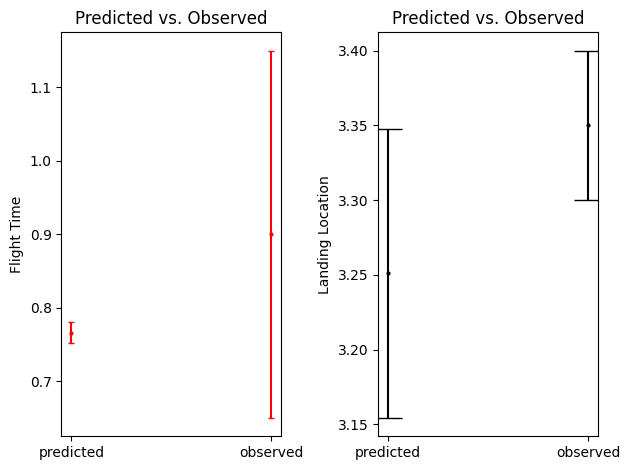

In [18]:
#| eval: false
#| echo: true

obs_xf =  3.35#Record your observed landing location.
δ_obs_xf = 0.05 # Record the uncertainty in your observed landing location.
obs_t =  0.9   # Record your observed flight time.
δ_obs_t = 0.25  # Recored the uncertainty in your observed flight time.

# Add figures here.

fig = plt.figure()            
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.errorbar([1,2],[tFlight,obs_t],yerr = [δt,δ_obs_t],fmt = 'ro',capsize = 2,ms = 2)
#ax1.set_xlim(0.38,0.42)
#ax1.set_ylim(1.2,1.3)
ax1.set_ylabel("Flight Time")
ax1.set_xticks([1,2],["predicted","observed"])
ax1.set_title("Predicted vs. Observed")

ax2.errorbar([1,2],[landingloc,obs_xf],yerr = [δloc,δ_obs_xf],fmt = 'ko',capsize = 10,ms = 2)
ax2.set_ylabel("Landing Location")
ax2.set_xticks([1,2],["predicted","observed"])
ax2.set_title("Predicted vs. Observed")
plt.tight_layout()